In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, LSTM
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

im_train = train_images / 255.0
im_test = test_images / 255.0

In [3]:
im_train_cnn = im_train.reshape(im_train.shape[0], 28, 28, 1)
im_test_cnn = im_test.reshape(im_test.shape[0], 28, 28, 1)

im_train_lstm = im_train.reshape(im_train.shape[0], 28, 28)
im_test_lstm = im_test.reshape(im_test.shape[0], 28, 28)

lbl_train = to_categorical(train_labels, 10)
lbl_test = to_categorical(test_labels, 10)

In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
start_cnn = time.time()
history_cnn = cnn_model.fit(im_train_cnn, lbl_train, epochs=30, batch_size=64,
                    validation_data=(im_test_cnn, lbl_test))
cnn_time = time.time() - start_cnn

Epoch 1/30


938/938 [==============================] - 16s 16ms/step - loss: 0.2559 - accuracy: 0.9220 - val_loss: 0.0548 - val_accuracy: 0.9825
Epoch 2/30
938/938 [==============================] - 13s 14ms/step - loss: 0.0876 - accuracy: 0.9737 - val_loss: 0.0408 - val_accuracy: 0.9861
Epoch 3/30
938/938 [==============================] - 14s 15ms/step - loss: 0.0659 - accuracy: 0.9801 - val_loss: 0.0325 - val_accuracy: 0.9885
Epoch 4/30
938/938 [==============================] - 13s 14ms/step - loss: 0.0534 - accuracy: 0.9840 - val_loss: 0.0344 - val_accuracy: 0.9899
Epoch 5/30
938/938 [==============================] - 14s 15ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0259 - val_accuracy: 0.9906
Epoch 6/30
938/938 [==============================] - 13s 14ms/step - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0230 - val_accuracy: 0.9929
Epoch 7/30
938/938 [==============================] - 13s 14ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0279 - val_accurac

In [7]:
lstm_model = Sequential([
    LSTM(128, input_shape=(28, 28)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [8]:
lstm_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [9]:
start_lstm = time.time()
history_lstm = lstm_model.fit(im_train_lstm, lbl_train,
                              epochs=30, batch_size=64,
                              validation_data=(im_test_lstm, lbl_test),
                              verbose=1)
lstm_time = time.time() - start_lstm

Epoch 1/30
938/938 [==============================] - 20s 20ms/step - loss: 0.6230 - accuracy: 0.8033 - val_loss: 0.1533 - val_accuracy: 0.9552
Epoch 2/30
938/938 [==============================] - 18s 20ms/step - loss: 0.1974 - accuracy: 0.9510 - val_loss: 0.1215 - val_accuracy: 0.9651
Epoch 3/30
938/938 [==============================] - 18s 20ms/step - loss: 0.1365 - accuracy: 0.9675 - val_loss: 0.0758 - val_accuracy: 0.9799
Epoch 4/30
938/938 [==============================] - 18s 19ms/step - loss: 0.1114 - accuracy: 0.9725 - val_loss: 0.0751 - val_accuracy: 0.9776
Epoch 5/30
938/938 [==============================] - 18s 20ms/step - loss: 0.0940 - accuracy: 0.9771 - val_loss: 0.0661 - val_accuracy: 0.9827
Epoch 6/30
938/938 [==============================] - 18s 19ms/step - loss: 0.0785 - accuracy: 0.9809 - val_loss: 0.0868 - val_accuracy: 0.9767
Epoch 7/30
938/938 [==============================] - 19s 20ms/step - loss: 0.0725 - accuracy: 0.9824 - val_loss: 0.0830 - val_accuracy:

In [10]:
epochs = [10, 20, 30]

accuracy_data = {
    'Epoch': epochs,
    'CNN Train Accuracy': [history_cnn.history['accuracy'][e-1] for e in epochs],
    'CNN Val Accuracy': [history_cnn.history['val_accuracy'][e-1] for e in epochs],
    'LSTM Train Accuracy': [history_lstm.history['accuracy'][e-1] for e in epochs],
    'LSTM Val Accuracy': [history_lstm.history['val_accuracy'][e-1] for e in epochs],
}
accuracy_df = pd.DataFrame(accuracy_data)

loss_data = {
    'Epoch': epochs,
    'CNN Train Loss': [history_cnn.history['loss'][e-1] for e in epochs],
    'CNN Val Loss': [history_cnn.history['val_loss'][e-1] for e in epochs],
    'LSTM Train Loss': [history_lstm.history['loss'][e-1] for e in epochs],
    'LSTM Val Loss': [history_lstm.history['val_loss'][e-1] for e in epochs],
}
loss_df = pd.DataFrame(loss_data)

print("\nModel Accuracy Comparison:\n")
print(accuracy_df)
print("\nModel Loss Comparison:\n")
print(loss_df)

print("\nTraining Time (s):")
print(pd.DataFrame({
    'Model': ['CNN', 'LSTM'],
    'Training Time(s)': [cnn_time, lstm_time]
}))



Model Accuracy Comparison:

   Epoch  CNN Train Accuracy  CNN Val Accuracy  LSTM Train Accuracy  \
0     10            0.992883            0.9918             0.987417   
1     20            0.995783            0.9927             0.993367   
2     30            0.996983            0.9934             0.996333   

   LSTM Val Accuracy  
0             0.9871  
1             0.9893  
2             0.9901  

Model Loss Comparison:

   Epoch  CNN Train Loss  CNN Val Loss  LSTM Train Loss  LSTM Val Loss
0     10        0.023049      0.025758         0.052914       0.053488
1     20        0.012059      0.029258         0.027247       0.054400
2     30        0.008502      0.032185         0.014626       0.061718

Training Time (s):
  Model  Training Time(s)
0   CNN        392.041251
1  LSTM        561.434602


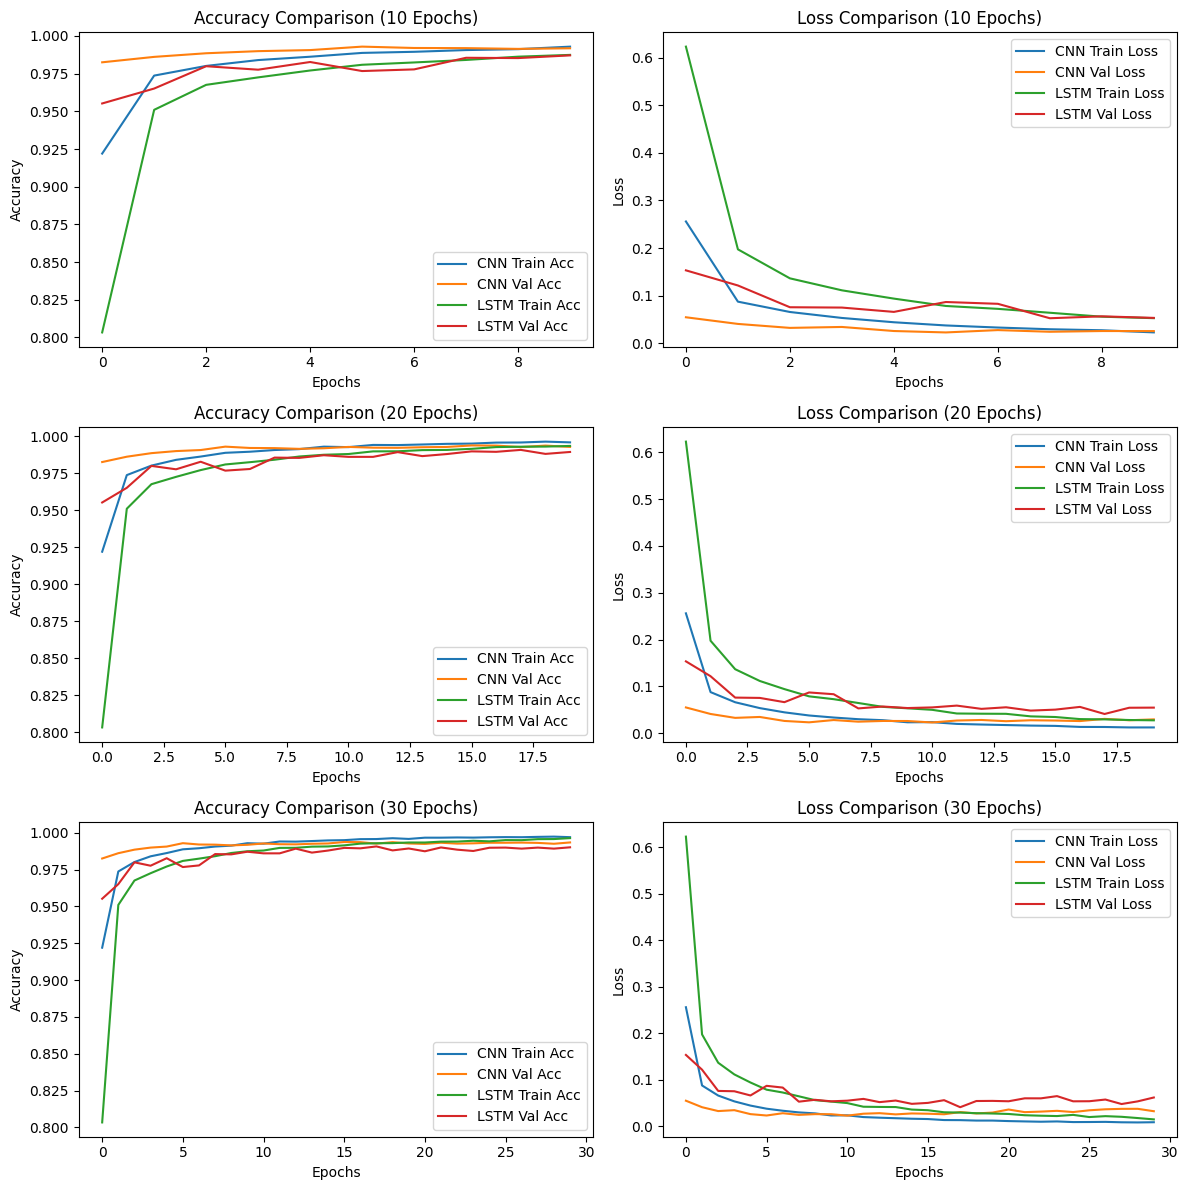

In [11]:
epoch_sets = [10, 20, 30]
plt.figure(figsize=(12, 12)) 

for i, epochs in enumerate(epoch_sets, 1):
    plt.subplot(3, 2, (i - 1) * 2 + 1)
    plt.plot(history_cnn.history['accuracy'][:epochs], label='CNN Train Acc')
    plt.plot(history_cnn.history['val_accuracy'][:epochs], label='CNN Val Acc')
    plt.plot(history_lstm.history['accuracy'][:epochs], label='LSTM Train Acc')
    plt.plot(history_lstm.history['val_accuracy'][:epochs], label='LSTM Val Acc')
    plt.title(f'Accuracy Comparison ({epochs} Epochs)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(3, 2, (i - 1) * 2 + 2)
    plt.plot(history_cnn.history['loss'][:epochs], label='CNN Train Loss')
    plt.plot(history_cnn.history['val_loss'][:epochs], label='CNN Val Loss')
    plt.plot(history_lstm.history['loss'][:epochs], label='LSTM Train Loss')
    plt.plot(history_lstm.history['val_loss'][:epochs], label='LSTM Val Loss')
    plt.title(f'Loss Comparison ({epochs} Epochs)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()